[[2014, 2015], [2015, 2016], [2016, 2017], [2017, 2018], [2018, 2019], [2019, 2020]]
[[105180, 5.7], [109132, 5.95], [117521, 6.05], [125421, 6.34], [138571, 6.73], [136466, 6.5]]


TypeError: ignored

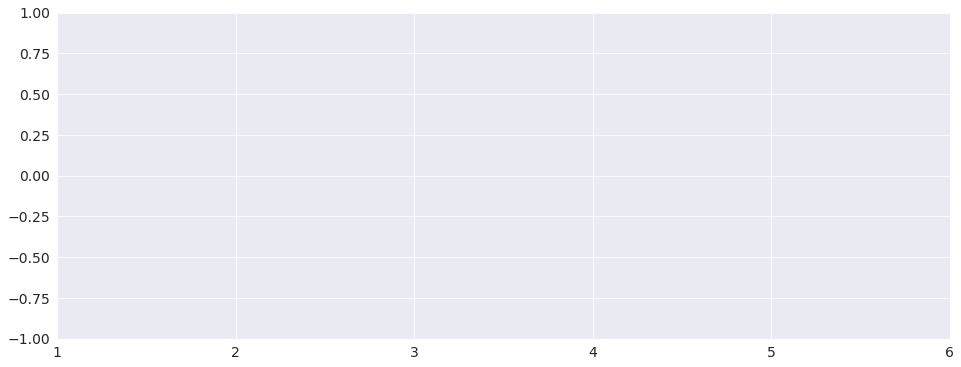

In [36]:
from pandas._libs.tslibs import period
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot



y = [[105180, 5.7],[109132, 5.95], [117521, 6.05], [125421, 6.34],[138571, 6.73],[136466, 6.5]]
x = [[2014, 2015],[2015, 2016],[2016,2017],[2017, 2018],[2018, 2019], [2019, 2020]]
print (x)
print(y)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [44]:
# fit and evaluate an AR model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
series = read_csv('/content/sample_data/Untitled spreadsheet - Sheet1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: ignored

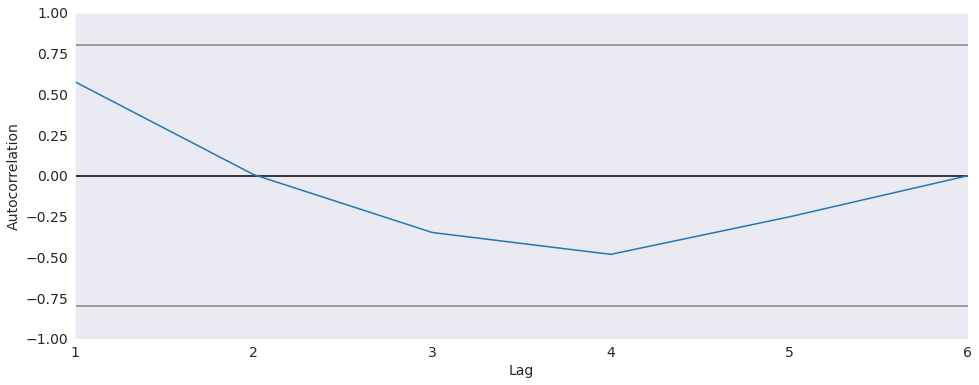

In [47]:



from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('/content/sample_data/Untitled spreadsheet - Sheet1.csv', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

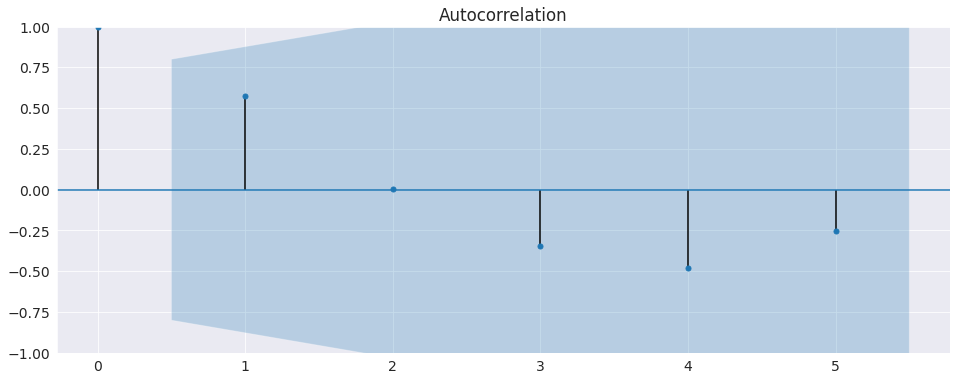

In [51]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('/content/sample_data/Untitled spreadsheet - Sheet1.csv', header=0, index_col=0)
plot_acf(series, lags=5)
pyplot.show()

Test MSE: 4431025.000


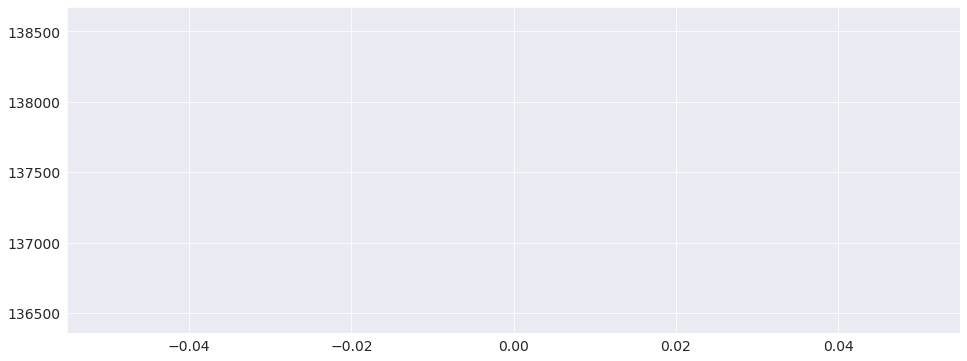

Coefficients: [-2.4064828e+04  1.2886708e+00]
predicted=154507.573719, expected=136466.000000
Test RMSE: 3.404


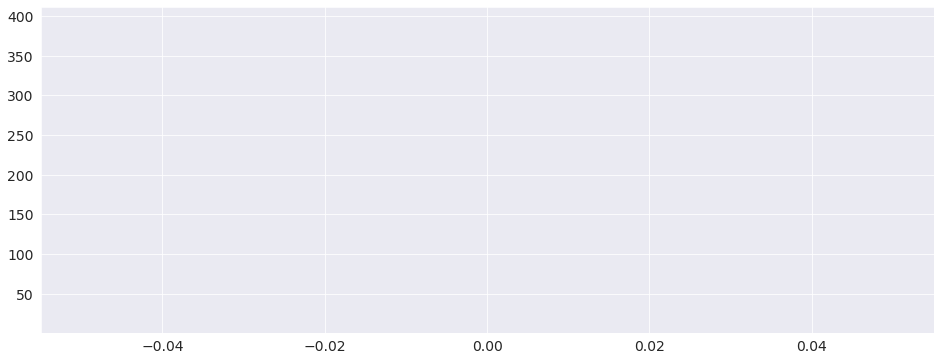

In [100]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('/content/sample_data/Untitled spreadsheet - Sheet1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags = 1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(sqrt(sqrt(sqrt(mean_squared_error(test, predictions)))))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(sqrt(sqrt(test)))
pyplot.plot(sqrt(predictions), color='red')
pyplot.show()
